In [24]:
from platform import python_version
print(python_version() )
import rebound
print(rebound.__version__)
import numpy as np
sim = rebound.Simulation()
sim.add(m=1.)
sim.add(m=1e-3, a=1.)
sim.add(m=1e-3, a=1.9)
sim.move_to_com()
sim.dt = sim.particles[1].P*0.05  # timestep is 5% of orbital period, snapshots
sim.integrator = "whfast"
sim.automateSimulationArchive("archive.bin",interval=1e3,deletefile=True) #path and name of binary file to write with

3.8.16
3.8.3


In [5]:
#integrate teh simulation foward in time
sim.integrate(1e6)

In [6]:
del sim

In [7]:
sa = rebound.SimulationArchive("archive.bin")

In [8]:
print("Number of snapshots: %d" % len(sa))
print("Time of first and last snapshot: %.1f, %.1f" % (sa.tmin, sa.tmax))

Number of snapshots: 1001
Time of first and last snapshot: 0.0, 1000000.0


In [10]:
#acess each snapshot by indexing the Simulation Archive
#returns a rebound simulation boject that corresponds to taht time
sim = sa[500] 
print(sim.t, sim.particles[1])

500000.311856871 <rebound.Particle object, m=0.001 x=0.9504733687298914 y=-0.31369991066301284 z=0.0 vx=0.3120007981838394 vy=0.9470716927681876 vz=0.0>


In [12]:
# store the eccentricity of teh inner planet as a function of time
eccentricities = np.zeros(len(sa))
for i, sim in enumerate(sa):
    eccentricities[i] = sim.particles[1].e

In [15]:
#If we want to access a simulation at a specific time, 
# such as in-between snapshots, one can use the getSimulation() function:
sim = sa.getSimulation(12345.6)
print(sim.t)
# by defult, it returns a simulation that corresponds to the snapshot that is nearby
# to get colers requested time, use mode
sim = sa.getSimulation(12345.6, mode = "exact")
print(sim.t)

12000.226030496653
12345.6


In [18]:
# we calculate the distance between the two planets at 432 times in the interval tmin, tmax
def thread_init(*rest):
    global sat
    sat = rebound.SimulationArchive("archive.bin")
def analyze(t):
    sim = sat.getSimulation(t,mode="close")
    d12 = sim.particles[1] - sim.particles[2]
    return np.sqrt(d12.x*d12.x+d12.y*d12.y+d12.z*d12.z)
pool = rebound.InterruptiblePool(initializer=thread_init)
times = np.linspace(sa.tmin, sa.tmax, 432)
distances = pool.map(analyze,times)
print(distances)

[0.9009990009990009, 1.8065390312943206, 2.805029814556182, 2.6434073006874286, 1.4514303745596178, 1.1768807589248427, 2.4595303076864417, 2.8797147450407956, 2.089220454871222, 0.916032268911493, 1.9096486850696712, 2.8419828982492046, 2.59153661071495, 1.358462238873739, 1.1093446313092383, 2.398276554216306, 2.8939568425937465, 2.170363590384683, 0.9417422577137512, 1.820715363664658, 2.8107382894443504, 2.641015581047193, 1.4408952344640995, 1.1857145892461298, 2.4627231248026846, 2.87506704250866, 2.0758109742370254, 0.9090897364996163, 1.718044934553722, 2.7725240725777414, 2.6908589908320053, 1.540607637117113, 1.1049239414352507, 2.395294590420565, 2.891791354074922, 2.1694875296307696, 0.9433759819414071, 1.823404545785497, 2.815250918851658, 2.644599227487237, 1.4450610898965954, 1.195436036756604, 2.328158299257051, 2.8984157266009123, 2.24595423011257, 0.9810405270844756, 1.7320979980432025, 2.7777995619293483, 2.6875477078108405, 1.5286409058249242, 1.1114025665723104, 2.

In [19]:
sim = rebound.Simulation()
sim.add(m=1.)
sim.add(m=1e-3, a=1.)
sim.add(m=1e-3, a=1.9)
sim.move_to_com()
sim.dt = sim.particles[1].P*0.05  # timestep is 5% of orbital period
sim.integrator = "whfast"

In [20]:
filename = 'testsa.bin'

Nout = 1000
times = np.logspace(0, 4, Nout)*sim.particles[1].P
for i, time in enumerate(times):
    sim.integrate(time, exact_finish_time=0) # need outputs on the nearest WHFast timesteps to the times we pass to get symplectic behavior
    sim.simulationarchive_snapshot(filename)

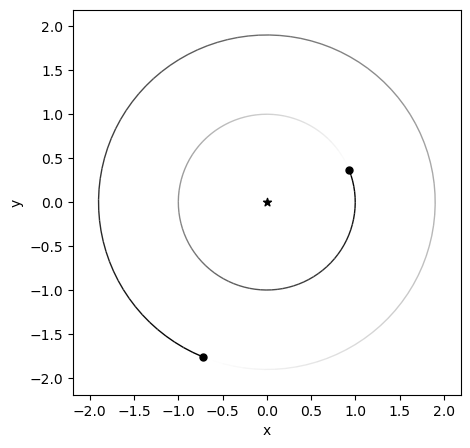

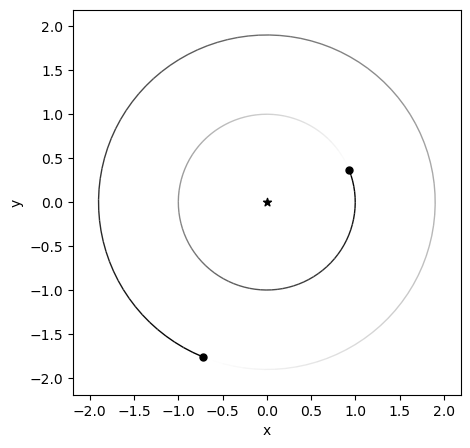

In [22]:
rebound.OrbitPlot(sim)